Data Cleaning

In [1]:
import pandas as pd
import re

# Load your dataset
dataset_path = 'dataset.csv'
dataset = pd.read_csv(dataset_path)

# Define a simple cleaning function
def clean_lyrics_simple(text):
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize by splitting on spaces
    tokens = text.split()
    # Rejoin tokens into a single string
    return ' '.join(tokens)

# Apply the cleaning function
dataset['cleaned_lyrics'] = dataset['lyrics'].apply(clean_lyrics_simple)

# Save the cleaned data
dataset.to_csv('cleaned_dataset.csv', index=False)

In [2]:
df=pd.read_csv('cleaned_dataset.csv')
df.head()

,genre,lyrics,SongInfo,cleaned_lyrics
0,Christian,"Who am I, that the Lord of all the earth Woul...",CASTING CROWNS - WHO AM I LYRICS,who am i that the lord of all the earth would ...
1,Christian,Glory Revealed By His Wounds He was pierced ...,GLORY REVEALED - BY HIS WOUNDS LYRICS,glory revealed by his wounds he was pierced fo...
2,Christian,Lord of heaven and earth Lord of all creation...,CAEDMON'S CALL - GOD OF WONDERS LYRICS,lord of heaven and earth lord of all creation ...
3,Christian,I can only imagine what it will be like When ...,MERCYME - I CAN ONLY IMAGINE LYRICS,i can only imagine what it will be like when i...
4,Christian,I am not skilled to understand What God has w...,AARON SHUST - MY SAVIOR MY GOD LYRICS,i am not skilled to understand what god has wi...


Feature Extractions (N-grams)

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

# Define a function to generate n-grams (bigrams and trigrams as examples)
def generate_ngrams(data, ngram_range=(1, 3)):
    vectorizer = CountVectorizer(ngram_range=ngram_range)
    ngrams = vectorizer.fit_transform(data['cleaned_lyrics'])
    ngram_df = pd.DataFrame(ngrams.toarray(), columns=vectorizer.get_feature_names_out())
    return ngram_df

# Generate bigrams and trigrams from cleaned lyrics
ngram_data = generate_ngrams(dataset, ngram_range=(2, 3))

# Concatenate n-grams with the original dataset for analysis
dataset_with_ngrams = pd.concat([dataset, ngram_data], axis=1)

# Save the n-grams for further analysis
dataset_with_ngrams.to_csv('dataset_with_ngrams.csv', index=False)


In [4]:
dataset_with_ngrams.head()

,genre,lyrics,SongInfo,cleaned_lyrics,aa aa,aa aa aa,aa aa where,aa diddle,aa diddle diddle,aa where,...,zoom like,zoom like dat,zooms like,zooms like you,zorro mark,zorro mark on,zulu gestapo,zulu gestapo you,zulu nation,zulu nation can
0,Christian,"Who am I, that the Lord of all the earth Woul...",CASTING CROWNS - WHO AM I LYRICS,who am i that the lord of all the earth would ...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Christian,Glory Revealed By His Wounds He was pierced ...,GLORY REVEALED - BY HIS WOUNDS LYRICS,glory revealed by his wounds he was pierced fo...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Christian,Lord of heaven and earth Lord of all creation...,CAEDMON'S CALL - GOD OF WONDERS LYRICS,lord of heaven and earth lord of all creation ...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Christian,I can only imagine what it will be like When ...,MERCYME - I CAN ONLY IMAGINE LYRICS,i can only imagine what it will be like when i...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Christian,I am not skilled to understand What God has w...,AARON SHUST - MY SAVIOR MY GOD LYRICS,i am not skilled to understand what god has wi...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Simple Classification Task

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Select features and target for classification
X = ngram_data  # Using n-grams as features
y = dataset['genre']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the classifier
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.47


Word Frequency Visualization

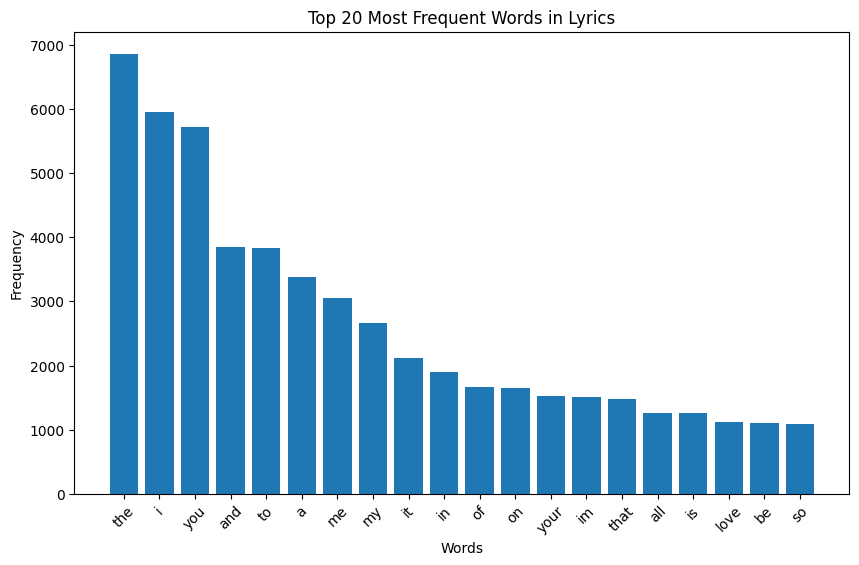

In [6]:
import matplotlib.pyplot as plt
from collections import Counter

# Concatenate all cleaned lyrics into one large text
all_text = ' '.join(dataset['cleaned_lyrics'])
# Count word frequencies
word_counts = Counter(all_text.split())
# Get the most common words
common_words = word_counts.most_common(20)

# Plotting
words, counts = zip(*common_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Words in Lyrics")
plt.show()


<ipython-input-7-c8c5e17ecbfd>:10: FutureWarning: Possible nested set at position 1
  words = re.findall(r"[[^a-zA-Z\s']]+", all_text)


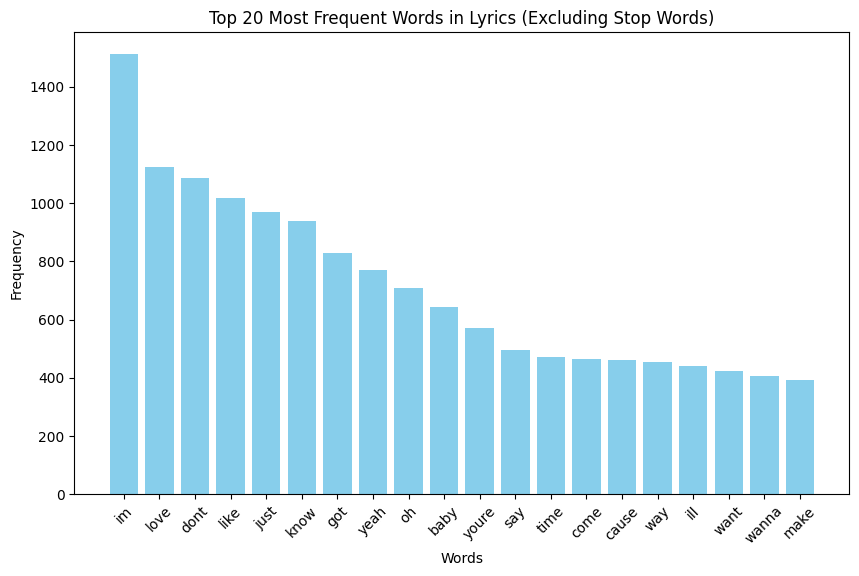

In [7]:
#without stop words
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Concatenate all cleaned lyrics into one large text
all_text = ' '.join(dataset['cleaned_lyrics'])

# Remove stop words
words = re.findall(r"[[^a-zA-Z\s']]+", all_text)
words = all_text.split()
filtered_words = [word for word in words if word not in ENGLISH_STOP_WORDS]

# Count word frequencies
word_counts = Counter(filtered_words)

# Get the most common words
common_words = word_counts.most_common(20)

# Plotting
words, counts = zip(*common_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Words in Lyrics (Excluding Stop Words)")
plt.show()

Sentiment Analysis Using TextBlob

In [8]:
from textblob import TextBlob

# Define a function to get sentiment
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Apply the function to each cleaned lyric
dataset[['polarity', 'subjectivity']] = dataset['cleaned_lyrics'].apply(lambda x: pd.Series(get_sentiment(x)))

# Save the dataset with sentiment scores
dataset.to_csv('dataset_with_sentiment.csv', index=False)


POS Tagging Using spaCy

In [9]:
import spacy

# Load English tokenizer, POS tagger, etc.
nlp = spacy.load("en_core_web_sm")

# Function to get POS tags
def pos_tagging(text):
    doc = nlp(text)
    return ' '.join([f"{token.text}/{token.pos_}" for token in doc])

# Apply POS tagging
dataset['pos_tags'] = dataset['cleaned_lyrics'].apply(pos_tagging)

# Save the dataset with POS tags
dataset.to_csv('dataset_with_pos_tags.csv', index=False)


TF-IDF Vectorization and Classification

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(dataset['cleaned_lyrics'])
y = dataset['genre']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train a Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

   Christian       0.87      0.71      0.78        28
     Country       0.75      0.35      0.48        17
     Hip-Hop       0.52      0.61      0.56        18
         Pop       0.08      0.36      0.13        11
         R&B       0.43      0.15      0.22        20
        Rock       0.67      0.11      0.19        18

    accuracy                           0.41       112
   macro avg       0.55      0.38      0.40       112
weighted avg       0.61      0.41      0.44       112



Confusion Matrix Plotting

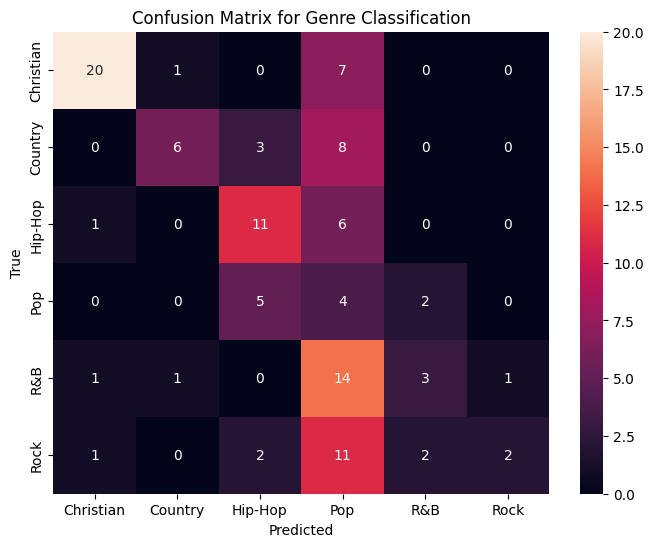

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Genre Classification")
plt.show()


N-gram Frequency Analysis

In [12]:
# Define function to get top n-grams
def get_top_ngrams(corpus, n=2, top_k=10):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:top_k]

# Get top bigrams
top_bigrams = get_top_ngrams(dataset['cleaned_lyrics'], n=2, top_k=10)
print("Top 10 Bigrams:", top_bigrams)

# Get top trigrams
top_trigrams = get_top_ngrams(dataset['cleaned_lyrics'], n=3, top_k=10)
print("Top 10 Trigrams:", top_trigrams)


Top 10 Bigrams: [('in the', 652), ('to the', 490), ('on the', 423), ('you know', 304), ('of the', 286), ('you can', 247), ('to be', 230), ('la la', 228), ('if you', 200), ('to me', 198)]
Top 10 Trigrams: [('la la la', 203), ('yeah yeah yeah', 121), ('colors colors colors', 97), ('you can get', 60), ('the way you', 56), ('talkin bout my', 56), ('it to me', 54), ('give it away', 51), ('catch me ridin', 50), ('me ridin dirty', 50)]


In [13]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer

# ngrams without stop words
def get_top_ngrams(corpus, n=2, top_k=10, stop_words='english'):
    vec = CountVectorizer(ngram_range=(n, n), stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:top_k]

# Get top bigrams
top_bigrams = get_top_ngrams(dataset['cleaned_lyrics'], n=2, top_k=10)
# Get top trigrams
top_trigrams = get_top_ngrams(dataset['cleaned_lyrics'], n=3, top_k=10)

print("Top 10 Bigrams:", top_bigrams)
print("Top 10 Trigrams:", top_trigrams)

Top 10 Bigrams: [('la la', 228), ('yeah yeah', 197), ('dont know', 135), ('love love', 115), ('colors colors', 113), ('oh yeah', 107), ('im gonna', 106), ('ive got', 90), ('dont stop', 86), ('talkin bout', 82)]
Top 10 Trigrams: [('la la la', 203), ('yeah yeah yeah', 121), ('colors colors colors', 97), ('love love love', 52), ('catch ridin dirty', 50), ('na na na', 49), ('away away away', 48), ('talkin bout generation', 48), ('tryin ta catch', 46), ('ta catch ridin', 45)]


 Feature Extraction and Preprocessing in Python

In [14]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

# Load the cleaned dataset
data = pd.read_csv("cleaned_dataset.csv")

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=500)
tfidf_matrix = tfidf_vectorizer.fit_transform(data['cleaned_lyrics'])

# N-gram Extraction (e.g., bigrams)
vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=100)
bigrams = vectorizer.fit_transform(data['cleaned_lyrics'])

# Save features for analysis
feature_df = pd.DataFrame(bigrams.toarray(), columns=vectorizer.get_feature_names_out())
feature_df.to_csv("ngram_features.csv", index=False)


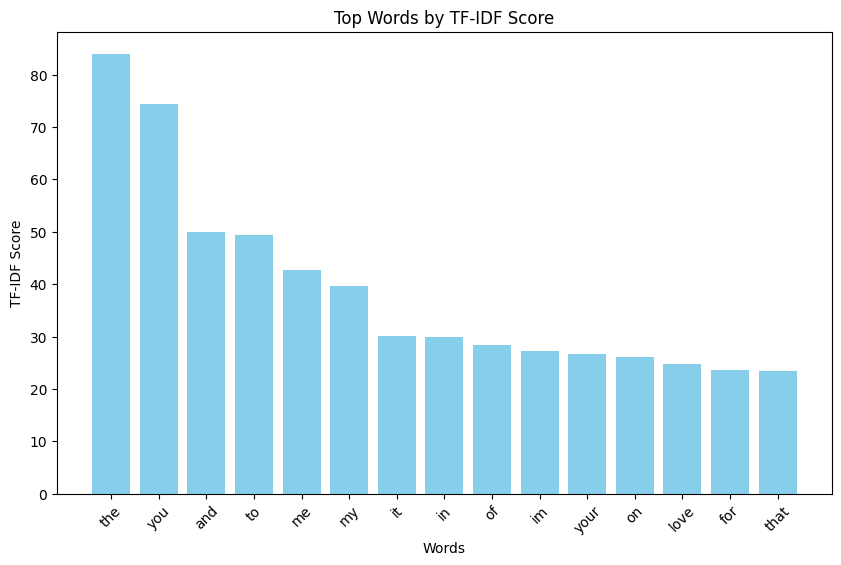

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Sum TF-IDF scores across all documents
tfidf_scores = tfidf_matrix.sum(axis=0).A1  # Convert sparse matrix to array
feature_names = tfidf_vectorizer.get_feature_names_out()

# Create a DataFrame for visualization
tfidf_df = pd.DataFrame({'word': feature_names, 'score': tfidf_scores})
tfidf_df = tfidf_df.sort_values(by='score', ascending=False).head(15)

# Plot the top 15 words
plt.figure(figsize=(10, 6))
plt.bar(tfidf_df['word'], tfidf_df['score'], color='skyblue')
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("TF-IDF Score")
plt.title("Top Words by TF-IDF Score")
plt.show()


Classification Experiment in Python

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Load data
X = tfidf_matrix  # Feature matrix from TF-IDF
y = data['genre']  # Assuming 'genre' is the target column

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.5446428571428571
              precision    recall  f1-score   support

   Christian       0.88      0.75      0.81        28
     Country       0.41      0.53      0.46        17
     Hip-Hop       0.82      0.78      0.80        18
         Pop       0.22      0.45      0.29        11
         R&B       0.71      0.50      0.59        20
        Rock       0.17      0.11      0.13        18

    accuracy                           0.54       112
   macro avg       0.53      0.52      0.51       112
weighted avg       0.59      0.54      0.56       112

